In [1]:
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import skimage.color as color
import skimage.filters as filters
from pathlib import Path
import h5py

In [2]:
target_stim_size = (512, 512)

In [3]:
base_dir = Path().resolve().parent
stim_dir = base_dir / 'stimuli'
toon_stim_dir = base_dir / 'stimuli' / 'toon_stims_raw'
toon_stim_files = list(toon_stim_dir.glob('*.jpg'))

In [4]:
stim_rgb_array = np.zeros((len(toon_stim_files)*2, *target_stim_size, 3), dtype=np.uint8)

index = 0
for i, tf in enumerate(toon_stim_files):
    stim = io.imread(tf)
    for direction in [-1,1]:
        stim_res = ski.transform.resize(stim[:,::direction][:,:stim.shape[0]][:,::direction], target_stim_size, anti_aliasing=True)
        stim_res = ski.img_as_ubyte(stim_res)
        stim_rgb_array[index] = stim_res[::-1,::1,:3]
        index += 1

git filter-branch --force --index-filter 'git rm --cached --ignore-unmatch stimuli/stims_1024.h5' --prune-empty --tag-name-filter cat -- --all

In [5]:
h5f = h5py.File(stim_dir / f'toon_stims_{target_stim_size[0]}.h5', 'w')
h5f.create_dataset('stimuli', data=stim_rgb_array, compression="gzip", compression_opts=5)
h5f.close()

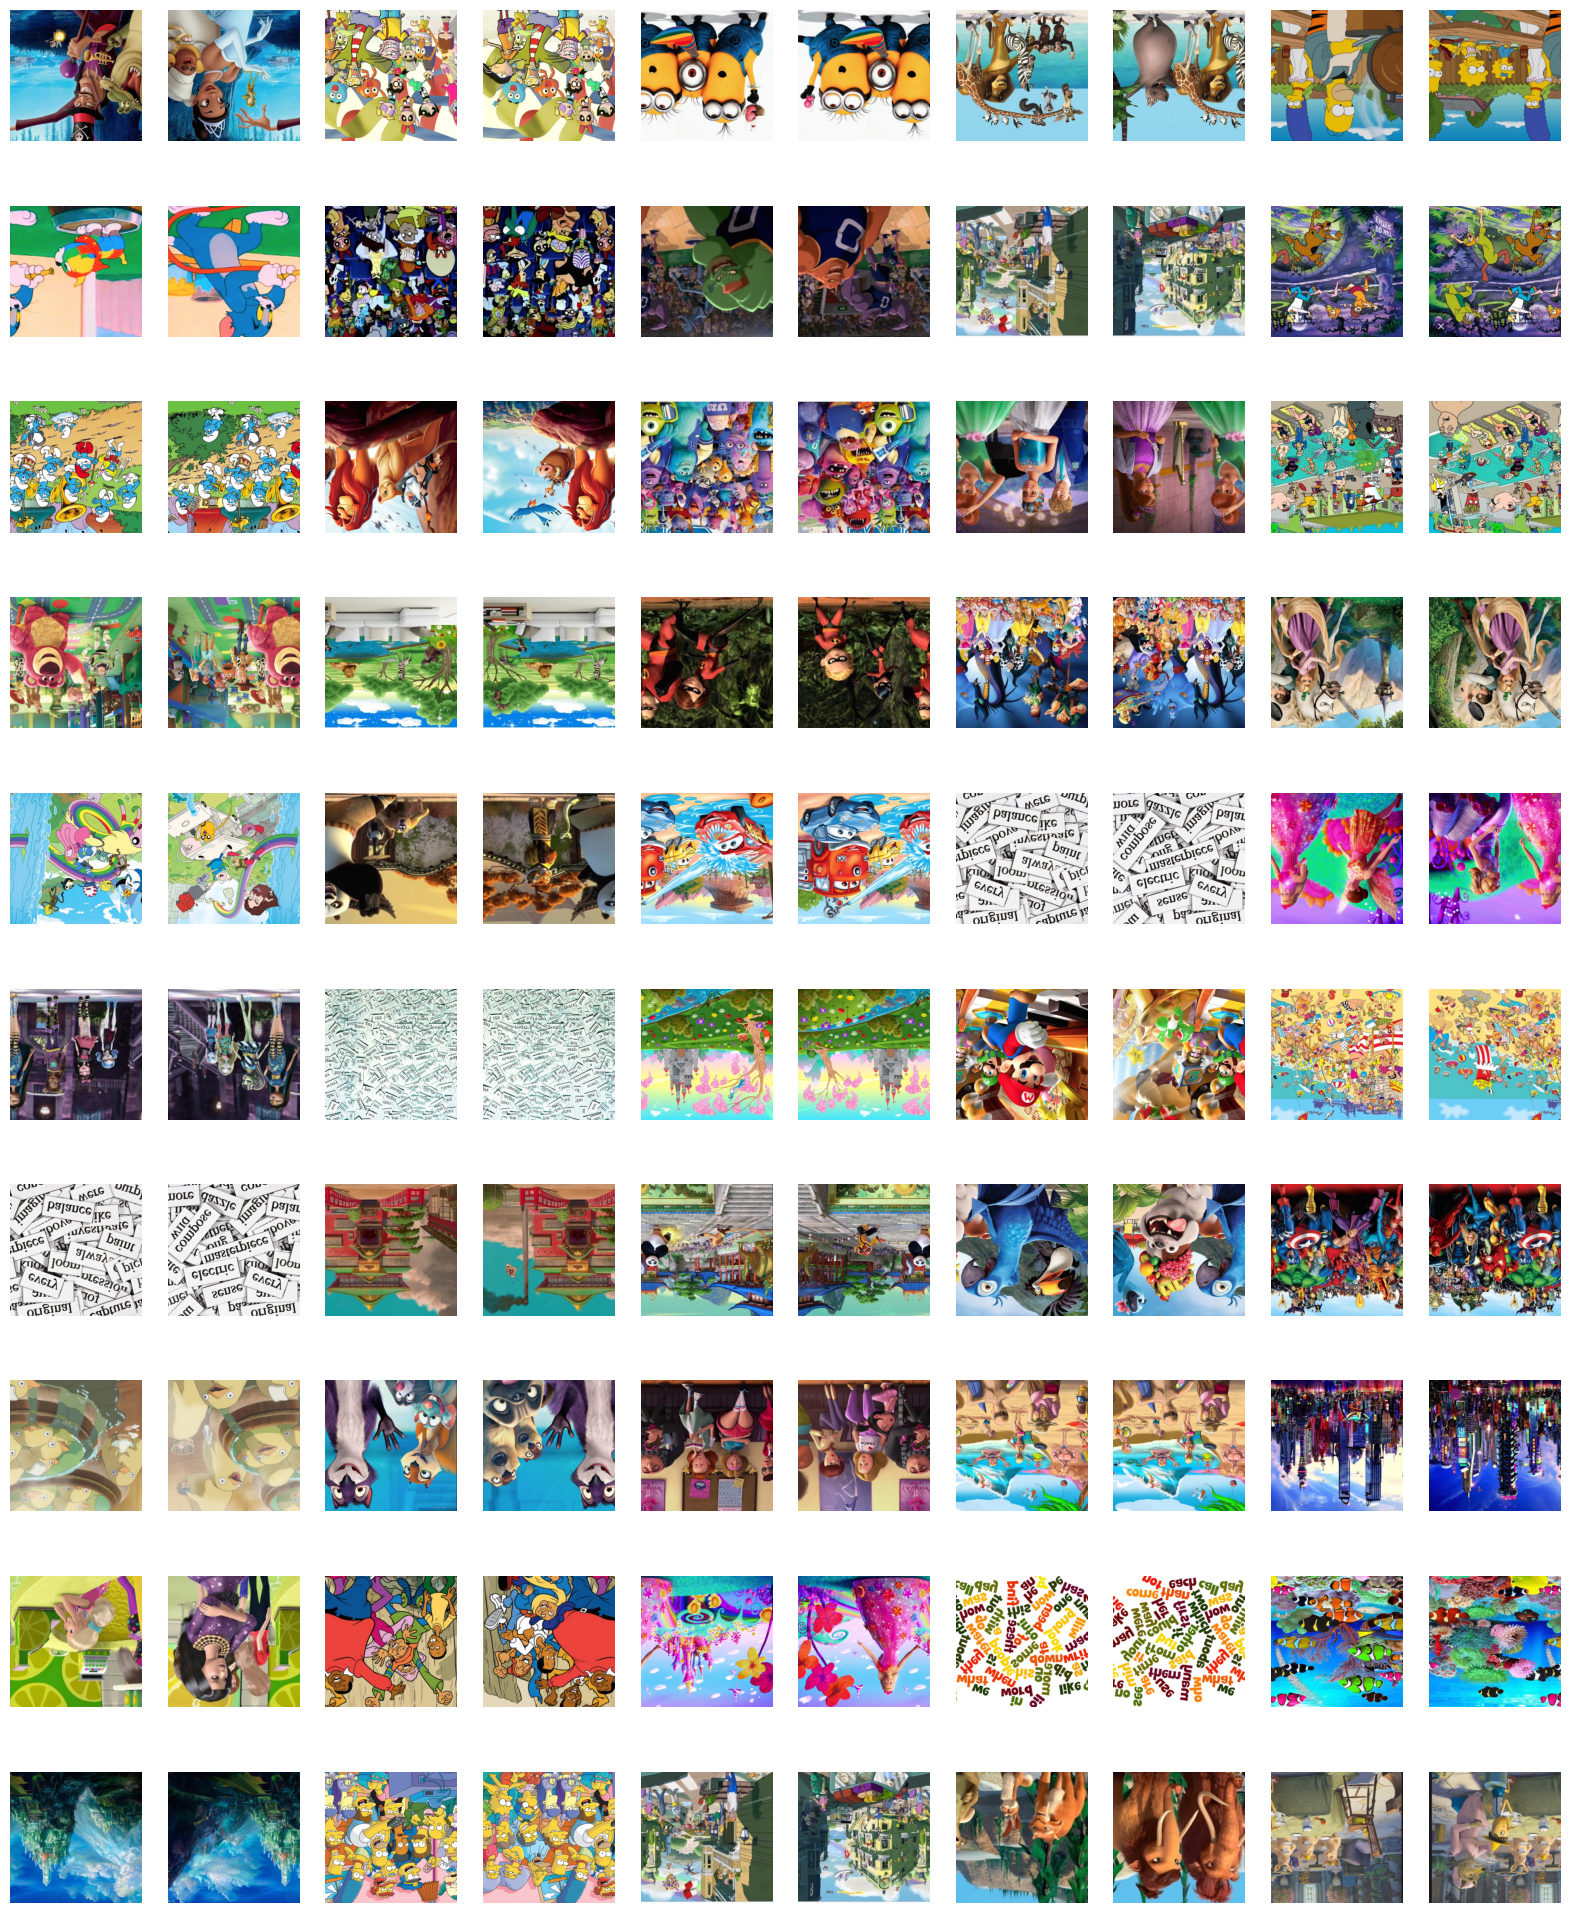

In [6]:
f, ss = plt.subplots(10, 10, figsize=(20, 25))
for i in range(100):
    ss[i//10, i%10].imshow(stim_rgb_array[i])
    ss[i//10, i%10].axis('off')